### Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('sampleReviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review
0,We won't be returning.
1,this is bad food and nothing great about it
2,This is my new fav Vegas buffet spot.
3,satisfy about this food
4,good all the way


### Data cleaning
#### Remove stop words
##### Download NLTK stopwords resources

In [48]:
import nltk
nltk.download('stopwords')

In [3]:
from nltk.corpus import stopwords

def stopwords_processing():
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    return all_stopwords

stopwords_processing()

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
import re
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def data_cleaning():
  corpus=[]
  st_words=stopwords_processing()
  import re
  for i in dataset['Review']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = set(review)
    review = [ps.stem(word) for word in review if not word in set(st_words)]
    review = ' '.join(review)
    corpus.append(review)
  return corpus

#data_cleaning()

### Data transformation

In [6]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='c1_BoW_Sentiment_Model.pkl'
cv = pickle.load(open(cvFile, "rb"))



In [7]:
corpus_word=data_cleaning()
X_fresh = cv.transform(corpus_word).toarray()
print(X_fresh)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Predictions (via sentiment classifier)

In [8]:
import joblib
classifier = joblib.load('Classifier_Sentiment_Model')


In [9]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 0 1 1 0 1 1 0 1 0 1 0 0]


In [10]:
dataset['predicted_label'] = y_pred.tolist()
dataset

,Review,predicted_label
0,We won't be returning.,0
1,this is bad food and nothing great about it,0
2,This is my new fav Vegas buffet spot.,1
3,satisfy about this food,1
4,good all the way,0
5,I seriously cannot believe that the owner has ...,1
6,"Very, very satisfy.",1
7,"i felt insulted and disrespected, how could yo...",0
8,How can you call yourself a steakhouse if you ...,1
9,I'm not impressed with the concept or the food.,0


In [90]:
predictions=[]
for label in dataset['predicted_label']:
    if label ==0:
        predictions.append("Negative")
    else:
        predictions.append("Positive")


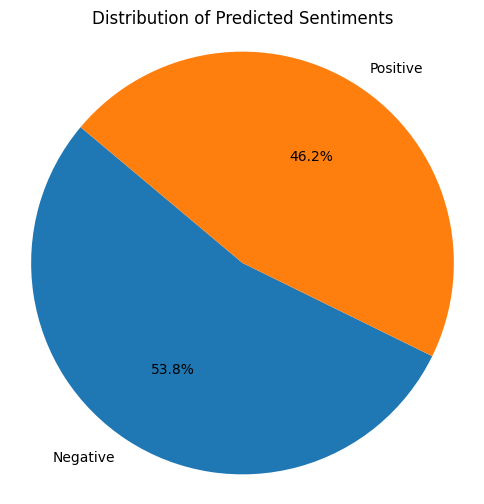

In [91]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter(predictions)


labels = label_counts.keys()
sizes = label_counts.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Predicted Sentiments')
plt.show()



In [16]:
dataset.to_csv("c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

In [24]:
corpus_word=data_cleaning()
words = ' '.join(corpus_word).split()
word_count = Counter(words)
word_count

Counter({'food': 4,
         'like': 3,
         'noth': 2,
         'buffet': 2,
         'satisfi': 2,
         'return': 1,
         'great': 1,
         'bad': 1,
         'spot': 1,
         'new': 1,
         'vega': 1,
         'fav': 1,
         'way': 1,
         'good': 1,
         'around': 1,
         'cannot': 1,
         'run': 1,
         'cut': 1,
         'mani': 1,
         'serious': 1,
         'chicken': 1,
         'unexperienc': 1,
         'head': 1,
         'owner': 1,
         'employe': 1,
         'believ': 1,
         'could': 1,
         'talk': 1,
         'anoth': 1,
         'felt': 1,
         'disrespect': 1,
         'judg': 1,
         'human': 1,
         'insult': 1,
         'properli': 1,
         'call': 1,
         'cook': 1,
         'steak': 1,
         'understand': 1,
         'steakhous': 1,
         'impress': 1,
         'concept': 1,
         'not': 1,
         'ed': 1,
         'guacamol': 1,
         'thing': 1,
         'pur': 1,
 

#### Top 10

In [25]:
word_count.most_common(10)

[('food', 4),
 ('like', 3),
 ('noth', 2),
 ('buffet', 2),
 ('satisfi', 2),
 ('return', 1),
 ('great', 1),
 ('bad', 1),
 ('spot', 1),
 ('new', 1)]